# CAPSTONE
## Battle of the Neighborhoods
### __Indian Restaurants__
_Ashutosh Upadhayay_

### -------------------------------------------------------------------------------------------------------

![Image of Yaktocat](https://cdn.getyourguide.com/img/tour_img-1667715-146.jpg)

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>
New York City (NYC), also known as the City of New York or simply New York (NY), is the most populous city in the United States. With an estimated 2018 population of 8,398,748 distributed over a land area of about 302.6 square miles (784 km2), New York is also the most densely populated major city in the United States.Located at the southern tip of the state of New York, the city is the center of the New York metropolitan area, the largest metropolitan area in the world by urban landmass and one of the world's most populous mega cities, with an estimated 19,979,477 people in its 2018 Metropolitan Statistical Area and 22,679,948 residents in its Combined Statistical Area.

A global power city, New York City has been described as the cultural, financial,and media capital of the world, and exerts a significant impact upon commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. The city's fast pace has inspired the term New York minute.Home to the headquarters of the United Nations,New York is an important center for international diplomacy & community.

##### __Indians in the New York City metropolitan region__
Indians in the New York City metropolitan region constitute one of the largest and fastest growing ethnicities in the New York City metropolitan area of the United States.
The New York City region is home to the largest Indian American population among metropolitan areas by a significant margin, enumerating 711,174 uniracial individuals by the 2013- 2017 U.S. Census American Community Survey estimates

With almost 700K inhabitants reporting Indian ancestry , the need to find and enjoy Indian cuisines is on the rise and demand.We are going to explore which neighborhoods and boroughs of New York City have the most as well as the best Indian restaurants. Additionally, I will attempt to answer the questions “Where should I open an Indian Restaurant?” and “Where should I stay If I want great Indian food?”  

![Image of Yaktocat](https://newyork.seriouseats.com/images/20120504-junoon-07.jpg)

##### __Problem Statement__
1.	What is / are the best location(s) for Indian cuisine in New York City?
2.	In what Neighborhood and/or borough should I open an Indian restaurant to have the best chance of being successful?
3.	Where would I go in New York City to have the best Indian food?

## Data <a name="data"></a>
In order to answer the above questions, data on New York City neighborhoods, boroughs to include boundaries, latitude, longitude, restaurants, and restaurant ratings and tips are required.

New York City data containing the neighborhoods and boroughs, latitudes, and longitudes will be obtained from the data source: https://cocl.us/new_york_dataset

New York City data containing neighborhood boundaries will be obtained from the data source: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

All data related to locations and quality of Indian restaurants will be obtained via the FourSquare API utilized via the Request library in Python.

## Methodology <a name="methodology"></a>
•	Data will be collected from https://cocl.us/new_york_dataset and cleaned and processed into a dataframe.

•	FourSquare be used to locate all venues and then filtered by Indian restaurants.  Ratings, tips, and likes by users will be counted and added to the dataframe.

•	Data will be sorted based on rankings

•	Finally, the data be will be visually assessed using graphing from various Python libraries.

## Analysis <a name="analysis"></a>

Load all the required libraries

In [51]:
import pandas as pd
import numpy as np
import requests
# from bs4 import BeautifulSoup
import os
#!conda install -c conda-forge folium=0.5.0 --yes
import folium 
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

print('Done!')

Done!


My variables

In [52]:
# CLIENT_ID = 'your-client-ID' # your Foursquare ID
# CLIENT_SECRET = 'your-client-secret' # your Foursquare Secret
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


Functions that will be used later

In [7]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=1000
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

Now lets use the above codes to get our initial NYC data

In [9]:
nyc_data = get_new_york_data()
nyc_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [10]:
nyc_data.shape

(306, 4)

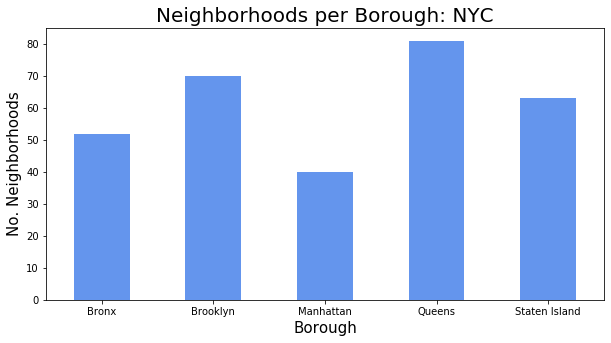

In [13]:
clr = "cornflowerblue"
nyc_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15,)
plt.xticks(rotation = 'horizontal')
# plt.set_xticklabels(x_labels)
plt.show()

Lets analyze further and see how many Indian restaurants there are in each neighborhood and borough and graph the results.

In [53]:
# queens has most neighborhoods
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in nyc_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
   # print('(',count,'/',len(nyc_data),')','Italian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
   # print(row)
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1
indian_rest_ny.shape

In [8]:
indian_rest_ny.to_csv('indian_rest_final.csv') # Save the information so far to a .csv file due to limited calls on FourSquare

In [22]:
indian_rest_ny = pd.read_csv('indian_rest_final.csv')
# indian_rest_ny.tail()
indian_rest_ny = indian_rest_ny.drop('Unnamed: 0', axis=1)
indian_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot
1,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill
2,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill


In [23]:
indian_rest_ny.shape

(141, 4)

As we continue our analysis, we see below that Queens had the highest number of neighborhoods, it does have the highest number of Indian restaurants.  Additionally, we see how many restaurants the top 6 neighborhoods have.  The neighborhood of Floral Park has the highest number of Indian restaurants in all of NYC and is actually located in the Borough of Queens vice Manhattan.

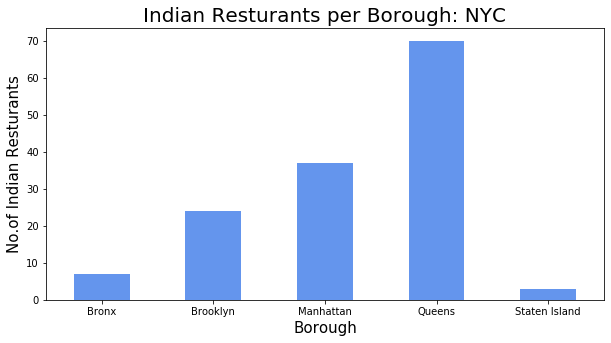

In [24]:
indian_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Indian Resturants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Indian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

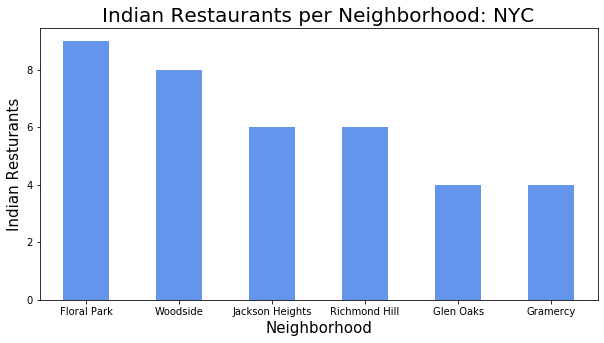

In [25]:
NOofNeigh = 6 # top number for graphing all the same past 6
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Indian Restaurants per Neighborhood: NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Indian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [26]:
indian_rest_ny[indian_rest_ny['Neighborhood']=='Floral Park']

,Borough,Neighborhood,ID,Name
95,Queens,Floral Park,527ffc0811d2d329d5e49abd,Jackson Diner
96,Queens,Floral Park,4b647b56f964a520c4b62ae3,Usha Foods & Usha Sweets
97,Queens,Floral Park,4e4e3e22bd4101d0d7a5c2d1,Kerala Kitchen
98,Queens,Floral Park,4b787c49f964a5209cd12ee3,Santoor Indian Restaurant
99,Queens,Floral Park,4c0c01e0bbc676b00d6b4cd5,Mumbai Xpress
100,Queens,Floral Park,4c76ff35a5676dcb72671721,Flavor Of India
101,Queens,Floral Park,4df0f39dd4c04d0392c853ea,Sagar Chinese
102,Queens,Floral Park,4cc642ed306e224b5bf2a76c,Shahi Darbar
103,Queens,Floral Park,4e6bfe1c7d8b2c711b17bbe5,Surya sweets and snacks


Now let's gather the data related to Rating , Likes and Tips for all the Indian Restaurants present in the vicinity. 

In [ ]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
indian_rest_stats_ny.shape

In [27]:
indian_rest_stats_ny.to_csv('indian_rest_stats_ny_csv_1.csv') # I continue to save data to a .csv as I move through this project
indian_rest_stats_ny = pd.read_csv('indian_rest_stats_ny_final.csv')

In [28]:
indian_rest_stats_ny.shape

(103, 8)

In [29]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
Unnamed: 0      103 non-null int64
Borough         103 non-null object
Neighborhood    103 non-null object
ID              103 non-null object
Name            103 non-null object
Likes           103 non-null int64
Rating          103 non-null float64
Tips            103 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.6+ KB


In [30]:
indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64')
indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64')
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 8 columns):
Unnamed: 0      103 non-null int64
Borough         103 non-null object
Neighborhood    103 non-null object
ID              103 non-null object
Name            103 non-null object
Likes           103 non-null float64
Rating          103 non-null float64
Tips            103 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.6+ KB


In [31]:
indian_rest_stats_ny.describe()

,Unnamed: 0,Likes,Rating,Tips
count,103.000000,103.000000,103.000000,103.000000
mean,51.000000,50.475728,7.862136,19.213592
std,29.877528,103.650794,1.025376,29.673600
min,0.000000,0.000000,0.000000,0.000000
25%,25.500000,9.000000,7.650000,3.000000
50%,51.000000,15.000000,7.900000,7.000000
75%,76.500000,39.000000,8.400000,24.000000
max,102.000000,590.000000,9.100000,146.000000


In [42]:
# Resturant with maximum Likes
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Unnamed: 0                            21
Borough                        Manhattan
Neighborhood                   Chinatown
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                590
Rating                               9.1
Tips                                 146
Name: 21, dtype: object

In [41]:
# Resturant with maximum Ratings
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Unnamed: 0                            21
Borough                        Manhattan
Neighborhood                   Chinatown
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                590
Rating                               9.1
Tips                                 146
Name: 21, dtype: object

In [40]:
# Resturant with maximum Tips
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

Unnamed: 0                            21
Borough                        Manhattan
Neighborhood                   Chinatown
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                590
Rating                               9.1
Tips                                 146
Name: 21, dtype: object

In [39]:
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
2,Battery Park City,9.10
46,Tribeca,9.10
11,Chinatown,9.10
45,Sunnyside,9.00
28,Long Island City,9.00
0,Astoria,8.85
5,Bedford Stuyvesant,8.80
13,Crown Heights,8.75
37,Prospect Heights,8.70
30,Manhattanville,8.70


In [38]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,8.525000
1,Brooklyn,8.243750
3,Queens,7.797143
0,Bronx,5.960000


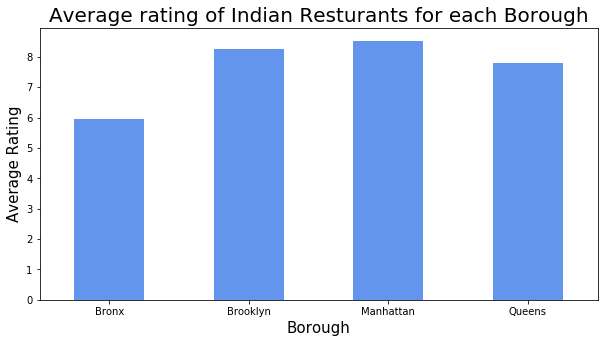

In [36]:
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot.bar(figsize=(10,5), color=clr)
plt.title('Average rating of Indian Resturants for each Borough', fontsize=20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

We will visually map the neighborhoods with an average rating greater than or equal to 8 after joining the appropriate dfs to include latitudes and longitudes.

In [43]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Astoria,8.850000
1,Auburndale,8.050000
2,Battery Park City,9.100000
3,Bay Ridge,8.400000
4,Bayside,8.050000
5,Bedford Stuyvesant,8.800000
10,Central Harlem,8.700000
11,Chinatown,9.100000
12,Clinton Hill,8.600000
13,Crown Heights,8.750000


In [50]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,nyc_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Astoria,40.768509,-73.915654,8.850000
1,Queens,Auburndale,40.761730,-73.791762,8.050000
2,Manhattan,Battery Park City,40.711932,-74.016869,9.100000
3,Brooklyn,Bay Ridge,40.625801,-74.030621,8.400000
4,Queens,Bayside,40.766041,-73.774274,8.050000
5,Brooklyn,Bedford Stuyvesant,40.687232,-73.941785,8.800000
6,Manhattan,Central Harlem,40.815976,-73.943211,8.700000
7,Manhattan,Chinatown,40.715618,-73.994279,9.100000
8,Brooklyn,Clinton Hill,40.693229,-73.967843,8.600000
9,Brooklyn,Crown Heights,40.670829,-73.943291,8.750000


Finally, we will visualize all NYC Borough's based on average rating and density of Indian restaurants 

In [45]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [46]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

In [48]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
ny_geo = r'Borough Boundaries.geojson'
ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='PuBu', #'YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)
# display map
# as this is huge map data , we will save it to a file
ny_map.save('borough_rating.html')

Click [here](https://github.com/ashutosh061982/Coursera_Capstone/blob/master/NYC_MAP_Ratings.JPG) to see the choropleth map of average ratings

Click [here](https://github.com/ashutosh061982/Coursera_Capstone/blob/master/NYC_MAP.JPG) to see the choropleth map of Indian restaurants density

## Results and Discussion <a name="results"></a>

Analysis shows and reveals New York City encompasses five county-level administrative divisions called boroughs: The Bronx, Brooklyn, Manhattan, Queens, and Staten Island.
Out of which Queens , Staten Islands and Brooklyn having the high number of neighborhoods respectively , after that Bronx & Manhattan with less number.  

Graph plot shows that Queens have the highest number of neighborhoods and Indian restaurants , Bronx and Staten Island have the least number of Indian restaurants.Additionally we can see that  Brooklyn & Manhattan are also having the good numbers in terms of Indian restaurants.   

Interesting fact is although **Queens** which is having the highest number of neighborhoods and Indian restaurants , but **Brooklyn & Manhattan** wins the place for best locations based on **Average Rating** of restaurants . Even all top six neighborhoods with highest number of Indian restaurant are also present in Queens itself, but not having enough average rating to qualify for the best place for Indian Food .

**Queens** is the most dense borough in regards to Indian Restaurants making competition high.Boroughs like Brooklyn & Manhattan provides less competition based on Indian restaurant density but maintaining the high average ratings. 

So at last finally we can say that based on above data and analysis : 

1.	**Best location(s) for Indian cuisine in New York City are Brooklyn & Manhattan based on average ratings.**  
2.	**Brooklyn & Manhattan provides less competition but maintains the high average ratings , Queens is highly competitive but don't have good ratings for the existing restaurants.**  
3.	**Best Indian food should be at Tamarind TriBeCa in Manhattan.** 



## Conclusion <a name="conclusion"></a>


Purpose of this project was to identify the Best location(s) for Indian cuisine and place for Best Indian Food. Additionally it also helps in identifying  NYC areas close to center with low number of restaurants (particularly Indian restaurants) in order to aid stakeholders in narrowing down the search for optimal location for a new Indian restaurant.

Final decision on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.